In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Matplotlib is building the font cache; this may take a moment.


## Data loading and understanding

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [4]:
required_columns = ['title', 'overview', 'genres', 'keywords']
df = df[required_columns]
df

,title,overview,genres,keywords
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...
2,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...
4,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...
...,...,...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,Comedy Romance,NaN
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",Comedy Drama Romance TV Movie,date love at first sight narration investigati...
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...,NaN,NaN


In [5]:
df.isnull().sum()

title         0
overview      3
genres       28
keywords    412
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4387 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4387 non-null   object
 1   overview  4387 non-null   object
 2   genres    4387 non-null   object
 3   keywords  4387 non-null   object
dtypes: object(4)
memory usage: 171.4+ KB


In [8]:
df['combined'] = df['overview'] + ' ' + df['genres'] + ' ' + df['keywords']


In [9]:
df.head()

,title,overview,genres,keywords,combined
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca..."


In [10]:
data = df[['title', 'combined']]
data

,title,combined
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...
4795,Bang,A young woman in L.A. is having a bad day: she...
4796,Primer,Friends/fledgling entrepreneurs invent a devic...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."


## Wordcloud to understand the data

In [11]:
combined_text = ' '.join(data['combined'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

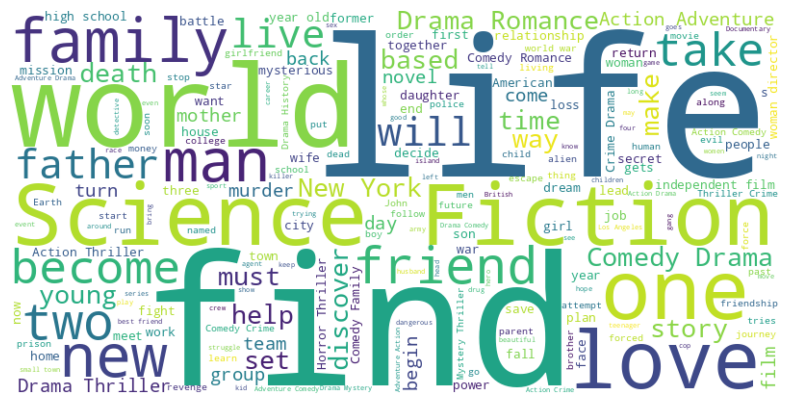

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
# Download nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))


In [15]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    token  = word_tokenize(text)  # Tokenize the text
    text = ' '.join([word for word in token if word not in stop_words])
    return text



In [16]:
data['cleaned_text'] = data['combined'].apply(preprocess_text)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_28888\430867211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['combined'].apply(preprocess_text)


In [17]:
data.head()

,title,combined,cleaned_text
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",nd century paraplegic marine dispatched moon p...
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",captain barbossa long believed dead come back ...
2,Spectre,A cryptic message from Bond’s past sends him o...,cryptic message bonds past sends trail uncover...
3,The Dark Knight Rises,Following the death of District Attorney Harve...,following death district attorney harvey dent ...
4,John Carter,"John Carter is a war-weary, former military ca...",john carter warweary former military captain w...


In [18]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])
# Calculate cosine similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [19]:
def recommend_movies(title, cosine_sim=cosine_sim ,df=data, top_n=5):
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Movie '{title}' not found in the dataset."
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))   
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Exclude the first one (itself)
    
    movies_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movies_indices]

In [20]:
data['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4795                                        Bang
4796                                      Primer
4798                                 El Mariachi
4800                   Signed, Sealed, Delivered
4802                           My Date with Drew
Name: title, Length: 4387, dtype: object

In [21]:
row_index = df[df['title'] == 'The Dark Knight'].index
print(row_index)

Index([65], dtype='int64')


In [22]:
recommend_movies('The Dark Knight', top_n=5)

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
1359                                     Batman
Name: title, dtype: object